## Fun with Steve's e-mail!

In the file `msg_count.csv` is some information about how much e-mail Steve has sent. Let's see if we can learn anything about it with a visualization!

In [1]:
# Standard imports PLUS our new import to make the pyplot plotting/graphing library available:
from cs103 import *
from typing import NamedTuple, List
import csv
import matplotlib.pyplot as pyplot

In [2]:
# Data Definitions. Nothing exciting happening here, but it is another example of HtDAP in action.
EmailMonth = NamedTuple('EmailMonth', [('year', int), # in range [1900, ...]
                                       ('month', int), # in range [1, 12]
                                       ('email_count', int)]) # in range [0, ...)
# interp. Number of email messages sent in a given month in a given year
EM1 = EmailMonth(2004, 8, 292)
EM2 = EmailMonth(2018, 2, 1158)
EM3 = EmailMonth(2016, 12, 1535)
EM4 = EmailMonth(2016, 11, 1380)

# templated based on compound (3 fields)
@typecheck
def fn_for_email_month(em: EmailMonth) -> ...:
    return ...(em.year,
               em.month,
               em.email_count)


# List[EmailMonth]
# interp. a list of EmailMonths
L1 = []
L2 = [EM1]
L3 = [EM1, EM2, EM3]

# template based on arbitrary-size and reference rule
@typecheck
def fn_for_loem(loem: List[EmailMonth]) -> ...:
    # description of acc
    acc = ... # Type: ...
    
    for em in loem:
        acc = ...(acc, fn_for_email_month(em))
        
    return ...(acc)

Design a function that takes a list of counts of e-mail messages sent per month (in calendar order) and plots them labeled as 1, 2, 3, 4,... for however many months are listed.

2 of 2 tests passed
2 of 2 tests passed


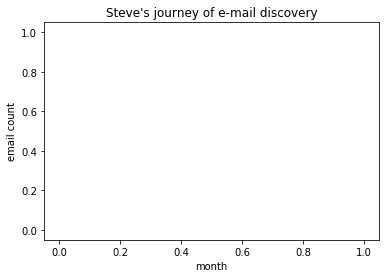

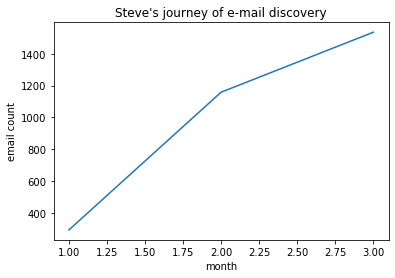

2 of 2 tests passed
3 of 3 tests passed


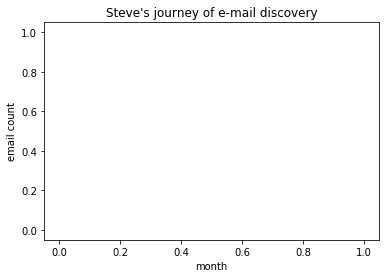

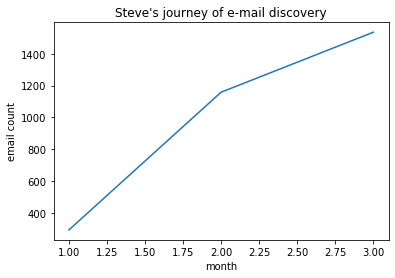

2 of 2 tests passed


In [9]:
@typecheck
def main(filename: str) -> None:
    """
    Reads the file from given filename and plots a graph showing how the 
    number of emails sent per month has changed over time (returning None)
    
    Assumes that information in the file represents consecutive month-by-month
    e-mail counts. (If the data is not in that form, it will still plot as if
    it WERE, i.e., ignores the month data given.)
    """
    # Template from HtDAP, based on composition
    return plot_data(read(filename))

@typecheck
def read(filename: str) -> List[EmailMonth]:
    """    
    Reads the file from given filename and returns a list of EmailMonths
    """
    #return []   #stub
    #template from HtDAP
    
    # loem contains the result so far
    loem = []   # type: List[EmailMonth]
    with open(filename) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader) # skip header line
        
        for row in reader:
            #print(row)  # Can be useful for debugging.
            cur_em = EmailMonth(parse_int(row[0]), parse_int(row[1]), parse_int(row[2]))
            loem.append(cur_em)
            
    return loem

@typecheck
def plot_data(loem: List[EmailMonth]) -> None:
    """
    Plots the number of emails sent per month, assuming the provided email data
    is in consecutive order by month.
    
    (If the data is not in that form, it will still plot as if it WERE, i.e.,
    ignores the month data given.)
    """
    #return None   #stub

    # We'll look at the worked example for line graphs and 
    # the exam reference sheet. These are effectively our template.
    
    # Template based on visualization

    # set the x-axis label, y-axis label, and plot title
    pyplot.xlabel('month')
    pyplot.ylabel('email count')
    pyplot.title('Steve\'s journey of e-mail discovery')

    # plot our data 
    x_vals = get_consecutive_numbers(loem)  # the numbers 1, 2, 3, ... for as many as there are elements in loem
    y_vals = get_email_numbers(loem)  # the number of e-mails per month from loem
    pyplot.plot(x_vals, y_vals)

    # show the plot
    pyplot.show()
    
    return None

@typecheck
def get_consecutive_numbers(loem: List[EmailMonth]) -> List[int]:
    """
    return a list of integers like 1, 2, 3, ... for as 
    many as there are elements in loem. (So for example, if
    loem is [], returns []. If loem has two elements, returns [1, 2].)
    """
    #return []  #stub
    #template from List[EmailMonth]

    # acc the list of numbers 1, 2, 3, ... of the same length as the list seen so far
    acc = [] # Type: List[int]
    
    # the next number to put in acc
    next_number = 1 # type: int
    
    for em in loem:
        # imagine acc were [1, 2], the next number would be 3
        # imagine acc were [1, 2, 3, 4], the next number would be 5
        acc.append(next_number)
        next_number = next_number + 1
        
    return acc

start_testing()
expect(get_consecutive_numbers([]), [])
expect(get_consecutive_numbers([EM1, EM2]), [1, 2])
summary()


@typecheck
def get_email_numbers(loem: List[EmailMonth]) -> List[int]:
    """
    return the number of e-mails per month from loem
    """
    #return []  #stub
    #template from List[EmailMonth]

    # acc the list of counts of emails per month of those seen so far
    acc = [] # Type: List[int]
    
    for em in loem:
        acc.append(em.email_count)
        
    return acc

start_testing()
expect(get_email_numbers([]), [])
expect(get_email_numbers([EM1, EM2]), [292, 1158])
summary()

start_testing()
# Should produce an empty graph with x-axis "month" and y-axis "email count"
# with the title "Steve's journey of e-mail discovery"
# As of now, we simply label the months 1, 2, 3, ... for however many months
# there are, although it might be better to label them in some more interesting way!
expect(main('msg_count_empty.csv'), None)

# Should produce a graph that looks a bit like:
#
#  email
#  count
#     |          
#     |       __/*
#     |      *
#     |     /
#     |    /
#     |   *
#     |    
#     +---------------------  month
#
# In English: plots three points: 292 at x=1, 1158 at x=2, and 1535 at x=3.
#
# Note that since we assume the numbers represent
# consecutive, in-order months, we get the plot "wrong"
# on this test file, but it's right for our specification.
#
# Just to show you what it looks like, we also sketched,
# took a picture of, and inserted an image of our test graph
# in the markdown cell below. Either a painfully-produced
# "sketch" like the one above or an easier one like the one
# below is fine!
#
# However, JUST an expect showing we return None is NOT SUFFICIENT.
expect(main('msg_count_test2.csv'), None)

summary()

start_testing()

expect(read("msg_count_empty.csv"), L1)
expect(read("msg_count_test1.csv"), L2)
expect(read("msg_count_test2.csv"), L3)

summary()

start_testing()
# Should produce an empty graph with x-axis "month" and y-axis "email count".
# with the title "Steve's journey of e-mail discovery"
# As of now, we simply label the months 1, 2, 3, ... for however many months
# there are, although it might be better to label them in some more interesting way!
expect(plot_data(L1), None)

# Should produce a graph that looks a bit like:
#
#  email
#  count
#     |          
#     |       __/*
#     |      *
#     |     /
#     |    /
#     |   *
#     |    
#     +---------------------  month
#
# Note that since we assume the numbers represent
# consecutive, in-order months, we get the plot "wrong"
# on this test file, but it's right for our specification.
#
# Just to show you what it looks like, we also sketched,
# took a picture of, and inserted an image of our test graph
# in the markdown cell below.
expect(plot_data(read('msg_count_test2.csv')), None)

summary()


Here's roughly what the more complex test should look like for both the `main` and `plot_data` functions. We put this in with the "Insert Image" option at the bottom of the "Edit" menu (usable inside Markdown cells like this one):

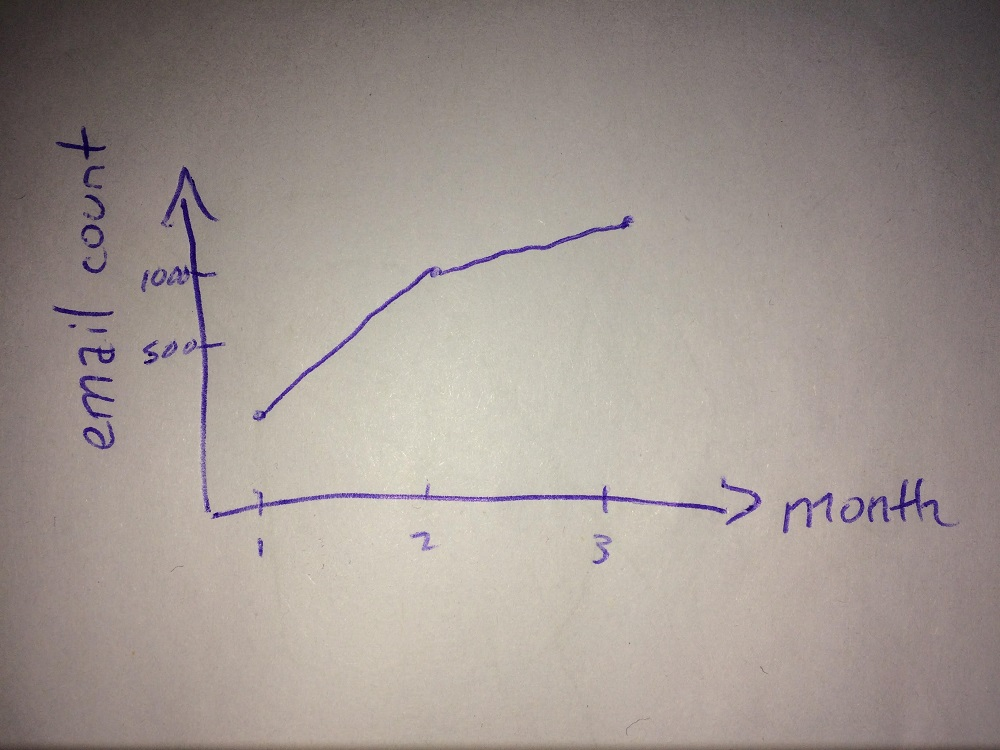

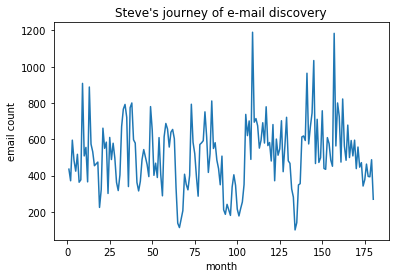

In [10]:
# Here we run on the full available information!
main("msg_count.csv")

## A graphing problem with a bit of analysis

Design a function to graph the total number of emails in a year over time. (Already-completed example.)

In [5]:
@typecheck
def main_v2(filename: str) -> None:
    """
    Reads the file from given filename and plots a graph showing how the 
    number of emails sent per year has changed over time (returning None)
    """
    # Template from HtDAP, based on composition
    return plot_data_v2(read(filename), [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

@typecheck
def plot_data_v2(loem: List[EmailMonth], years: List[int]) -> None:
    """
    Plots the number of emails sent per year in years (the parameter)
    """
    #return None  #stub
    # Template based on visualization
    
    y_values = get_email_counts_per_year(loem, years)
    
    # template from visualization
    # set the x-axis label, y-axis label, and plot title
    pyplot.xlabel('Year')
    pyplot.ylabel('Email Volume')
    pyplot.title('Number of Emails Sent Per Year')
    
    if loem != []:
        pyplot.axis([min(years)-1, max(years) + 1, -1, max(y_values) + 1])
    
    # plot our data 
    line = pyplot.plot(years, y_values)

    # show the plot
    pyplot.show()
    
    return None


@typecheck
def get_email_counts_per_year(loem: List[EmailMonth], year_list: List[int]) -> List[int]:
    """
    Creates a list of ints that represent the number of emails sent each year in year_list
    """
    # return [] # List[int]
    
    # template from List[int]
    # acc will hold the list of emails for each year
    acc = [] # Type: List[int]
    
    for yr in year_list:
        acc.append(combine_counts_for_year(loem, yr))
    
    return acc

@typecheck
def combine_counts_for_year(loem: List[EmailMonth], year: int) -> int:
    """
    Finds the total number of emails sent for the given year.
    """
    
    # return 0 # Stub
    
    # template from List[EmailMonth]
    # total_count is the total number of emails seen so far from the EmailMonths in the year we are interested in
    total_count = 0 # Type: int
    
    for em in loem:
        # You might check this without a helper function, but it's a judgment call.. so we wrote one.
        if years_match(em, year):
            total_count = total_count + em.email_count
            
    return total_count

@typecheck
def years_match(em: EmailMonth, year: int) -> bool:
    """
    produce true if em is from the given year (and false otherwise)
    """
    #return False #stub
    
    # template based on EmailMonth
    return year == em.year




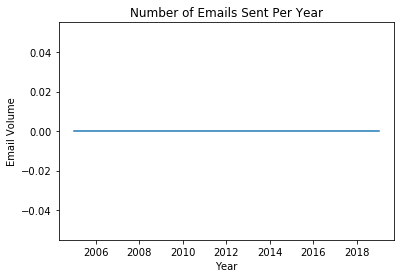

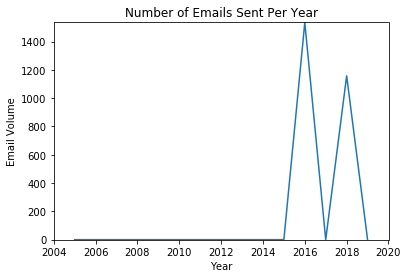

2 of 2 tests passed


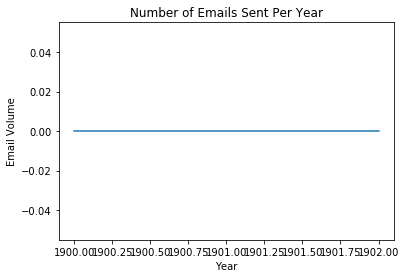

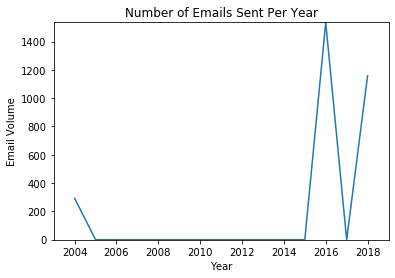

2 of 2 tests passed
3 of 3 tests passed
3 of 3 tests passed
4 of 4 tests passed


In [6]:
start_testing()
# Should show a graph with a horizontal line at 0 messages for the years 2004 to 2018 and
# x-axis "year" (labelled for those years), y-axis "Email Volume", and title
# "Number of Emails Sent Per Year".
expect(main_v2('msg_count_empty.csv'), None)

# Should produce a graph similar to the one above except that 2004, 2016, and 2018 have
# "blips" of various heights (about 300, about 1550, and about 1150, respectively).
expect(main_v2('msg_count_test2.csv'), None)
summary()

start_testing()
# Should show a graph with a horizontal line at 0 messages for the years 1900-1902 and
# x-axis "year" (labelled for those years), y-axis "Email Volume", and title
# "Number of Emails Sent Per Year".
expect(plot_data_v2([], [1900, 1901, 1902]), None)

# Should produce a graph similar to the one above except that 2004, 2016, and 2018 have
# "blips" of various heights (about 300, about 1550, and about 1150, respectively).
expect(plot_data_v2(L3, [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]), None)
summary()



start_testing()
expect(get_email_counts_per_year(L3, []), [])
expect(get_email_counts_per_year(L3, [2004]), [292])
expect(get_email_counts_per_year([EM1, EM2, EM3, EM4], [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]), [292, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2915])
summary()

start_testing()
expect(combine_counts_for_year([], 2015), 0)
expect(combine_counts_for_year(L3, 2004), 292)
expect(combine_counts_for_year([EM1, EM2, EM3, EM4], 2016), 2915)
summary()

start_testing()
expect(years_match(EM1, 2004), True)
expect(years_match(EM1, 2018), False)
expect(years_match(EM2, 2004), False)
expect(years_match(EM2, 2018), True)
summary()

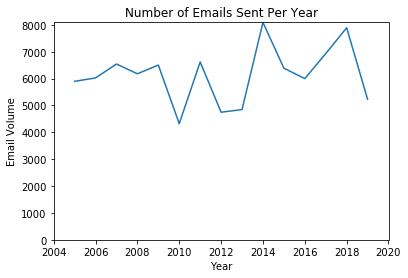

In [7]:
main_v2("msg_count.csv")